# Data Analysis of Stack Overflow Annual Developer Survey 2020

This analysis explores the Stack Overflow Annual Developer Survey 2020 dataset. The goal is to uncover insights about the demographics, programming habits, and job preferences of developers.

## Data Loading and Preprocessing

We start by loading the dataset and examining its structure.


In [1]:
import pandas as pd

survey_raw_df: pd.DataFrame = pd.read_csv("survey_results_public.csv")
survey_raw_df


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [2]:
display(survey_raw_df.columns.unique())
len(survey_raw_df.columns.unique())

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

61

In [26]:
schema_raw_df = pd.read_csv("survey_results_schema.csv", index_col="Column").QuestionText
schema_raw_df

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [3]:
schema_raw_df["Age"]
len(schema_raw_df)


61

## Data Preparation & Cleaning

In [4]:
from typing import List

selected_columns = [
    # Demographics
    'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor',
    # Programming experience 
    'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith', 
    'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck',
    # Employment 
    'Employment', 'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 
    'NEWOvertime', 'NEWEdImpt'
]



In [6]:
len(selected_columns)

20

In [5]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df


,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [6]:
survey_df["Age1stCode"] = pd.to_numeric(survey_df["Age1stCode"], errors="coerce")
survey_df["YearsCode"] = pd.to_numeric(survey_df["YearsCode"], errors="coerce")
survey_df["YearsCodePro"] = pd.to_numeric(survey_df["YearsCodePro"], errors="coerce")


In [7]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [12]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


## Correcting The Age Data & WorkWeekHrs where rows are irrelavant data

In [8]:
survey_df = survey_df[(survey_df["Age"] >= 1) & (survey_df["Age"] <= 100)]

survey_df = survey_df[survey_df["WorkWeekHrs"] <= 140]

In [14]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,35049.000000,34804.000000,34806.000000,33442.000000,35049.000000
mean,32.149251,15.183284,14.321784,8.876054,40.057538
std,8.639525,4.710008,9.344937,7.633256,10.276646
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,26.000000,12.000000,7.000000,3.000000,40.000000
50%,30.000000,15.000000,12.000000,6.000000,40.000000
75%,36.000000,18.000000,20.000000,12.000000,43.000000
max,99.000000,55.000000,50.000000,50.000000,140.000000


In [15]:
survey_df["Gender"].value_counts()

Gender
Man                                                            31756
Woman                                                           2486
Non-binary, genderqueer, or gender non-conforming                236
Man;Non-binary, genderqueer, or gender non-conforming             81
Woman;Non-binary, genderqueer, or gender non-conforming           56
Woman;Man                                                         23
Woman;Man;Non-binary, genderqueer, or gender non-conforming       11
Name: count, dtype: int64

In [9]:
import numpy as np

survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.NaN, inplace=True)

In [10]:
survey_df["Gender"].value_counts()

Gender
Man                                                  31756
Woman                                                 2486
Non-binary, genderqueer, or gender non-conforming      236
Name: count, dtype: int64

## Now Data is Ready For Analysis

In [85]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
12747,Germany,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,12.0,5.0,JavaScript;Python;Ruby,Go;Java;Kotlin;Python;Ruby,Every few months,Play games;Call a coworker or friend;Visit Sta...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, full-stack;Educ...",30.0,Very satisfied,Remote work options;How widely used or impactf...,Sometimes: 1-2 days per month but less than we...,Very important
57039,India,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,5.0,3.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;SQL,Dart;Go;Python,Every few months,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",45.0,Slightly satisfied,Diversity of the company or organization;Flex ...,Often: 1-2 days per week or more,Very important
11883,India,34.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,16.0,16.0,11.0,HTML/CSS;JavaScript;PHP;Python;SQL,Go;HTML/CSS;JavaScript;Kotlin;Perl;PHP;Python;...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;DevOps specialist;Engine...",50.0,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Critically important
915,Canada,29.0,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",No,17.0,13.0,10.0,C#;C++;HTML/CSS;Java;JavaScript;SQL;VBA,NaN,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Database administrator;Developer, back-end;Dev...",40.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Somewhat important
54440,Romania,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Yes,33.0,3.0,NaN,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript,Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScri...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Fairly important
31992,Belarus,46.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,16.0,10.0,3.0,Assembly;C,Bash/Shell/PowerShell;Python,Once a year,Meditate;Visit Stack Overflow;Go for a walk or...,Employed full-time,Educator;System administrator,60.0,Neither satisfied nor dissatisfied,Diversity of the company or organization;Flex ...,Often: 1-2 days per week or more,Very important
17635,United States,53.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,Yes,13.0,40.0,29.0,Java;SQL;VBA,C#;Java;SQL,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data or business analyst;Database administrato...,40.0,Neither satisfied nor dissatisfied,Specific department or team I’d be working on;...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
51044,Germany,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,14.0,5.0,Java;VBA,C++;Java;JavaScript;PHP;Python;SQL,Once every few years,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",38.0,Very dissatisfied,Specific department or team I’d be working on;...,Often: 1-2 days per week or more,Not at all important/not necessary
23455,France,37.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathe

## Exploratory Analysis & Visualization

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [88]:
schema_raw_df.Country

'Where do you live?'

In [91]:
survey_df.Country.nunique()

156

In [92]:
survey_df.Country.value_counts()

Country
United States     7812
India             3032
United Kingdom    2535
Germany           2364
Canada            1284
                  ... 
Maldives             1
Monaco               1
Tajikistan           1
Niger                1
Yemen                1
Name: count, Length: 156, dtype: int64

In [12]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries

Country
United States     7812
India             3032
United Kingdom    2535
Germany           2364
Canada            1284
France            1132
Brazil            1125
Netherlands        835
Poland             811
Australia          771
Name: count, dtype: int64

## Now Analyzing Countries Responses Through a Bar Chart

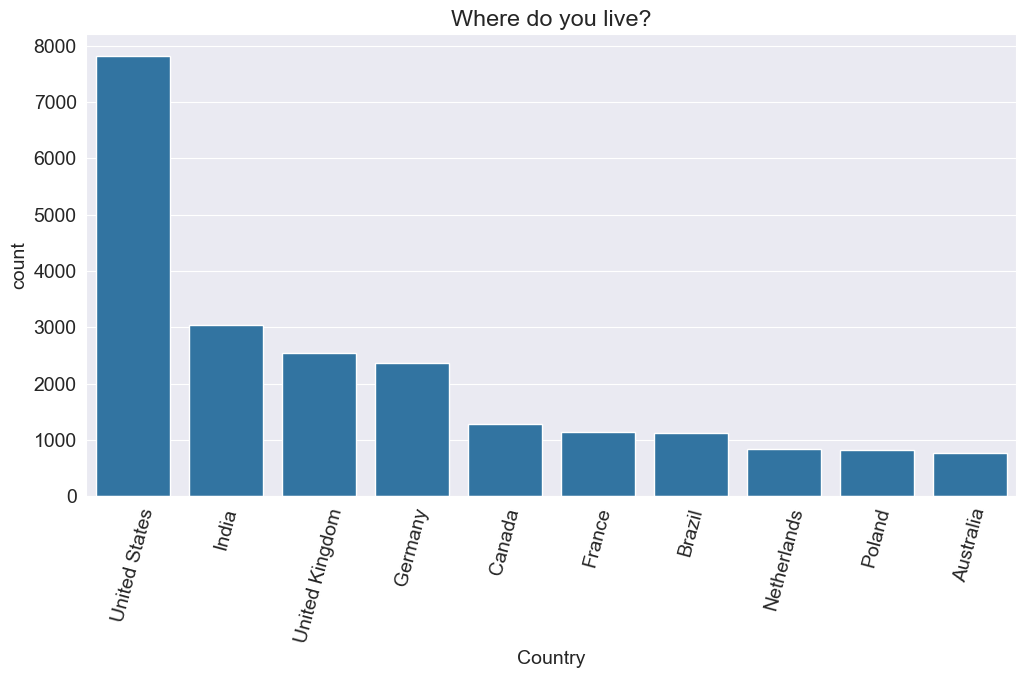

In [96]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema_raw_df.Country)
sns.barplot(x=top_countries.index, y=top_countries);

## Now Analyzing The Age

(array([4.0000e+00, 3.0300e+02, 5.3880e+03, 1.0318e+04, 7.9040e+03,
        5.0360e+03, 2.6720e+03, 1.4990e+03, 8.8200e+02, 5.0400e+02,
        2.4000e+02, 7.5000e+01, 3.2000e+01, 8.0000e+00, 2.0000e+00,
        4.0000e+00, 0.0000e+00]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75., 80., 85., 90., 95.]),
 <BarContainer object of 17 artists>)

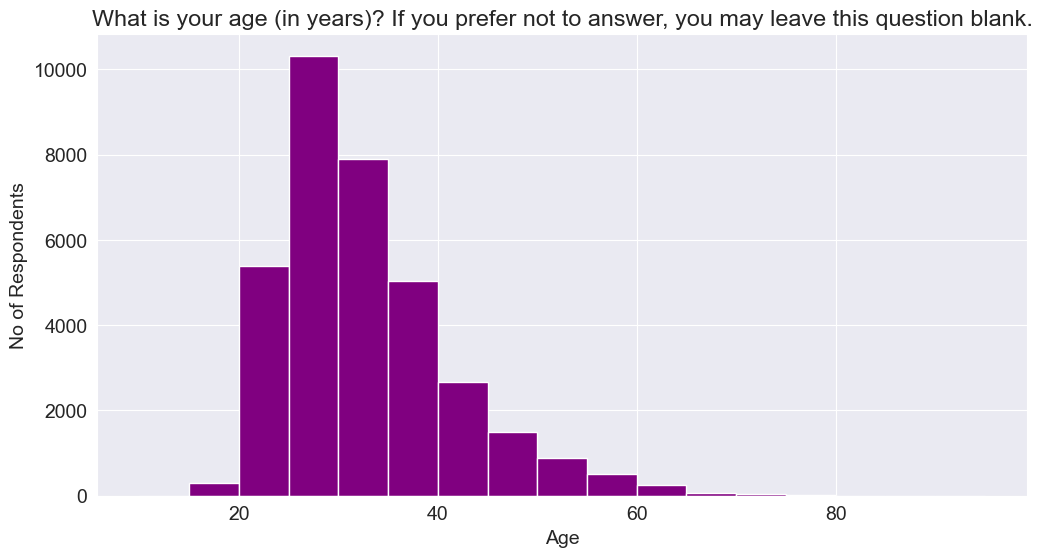

In [98]:
plt.figure(figsize=(12,6))
plt.title(schema_raw_df.Age)
plt.xlabel("Age")
plt.ylabel("No of Respondents")

plt.hist(survey_df.Age, bins=np.arange(10,100,5),color="purple")

## Analyzing Responses of Genders

In [99]:
schema_raw_df.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [104]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Gender
Man                                                  31756
Woman                                                 2486
NaN                                                    571
Non-binary, genderqueer, or gender non-conforming      236
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x209b8946f00>,
 [Text(-1.0524293035734766, 0.3199883763199021, 'Man'),
  Text(1.0265510014657044, -0.3952126533775956, 'Woman'),
  Text(1.0951964219655697, -0.10268786351762377, 'nan'),
  Text(1.0997538922686838, -0.023267497499306747, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(-0.5740523474037145, 0.17453911435631023, '90.6%'),
  Text(0.5599369098903841, -0.2155705382059612, '7.1%'),
  Text(0.5973798665266743, -0.056011561918703864, '1.6%'),
  Text(0.599865759419282, -0.012691362272349132, '0.7%')])

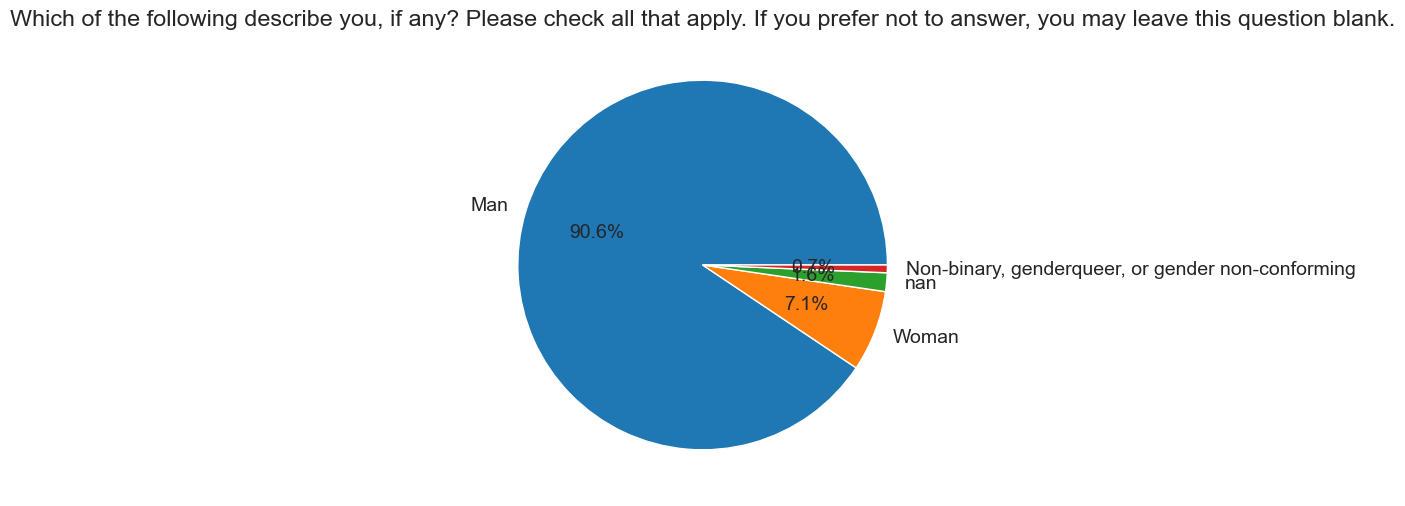

In [106]:
plt.figure(figsize=(12,6))
plt.title(schema_raw_df.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')


## Now Analyzing The Education Level of Respondents

In [110]:
schema_raw_df.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [114]:
survey_df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', nan,
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

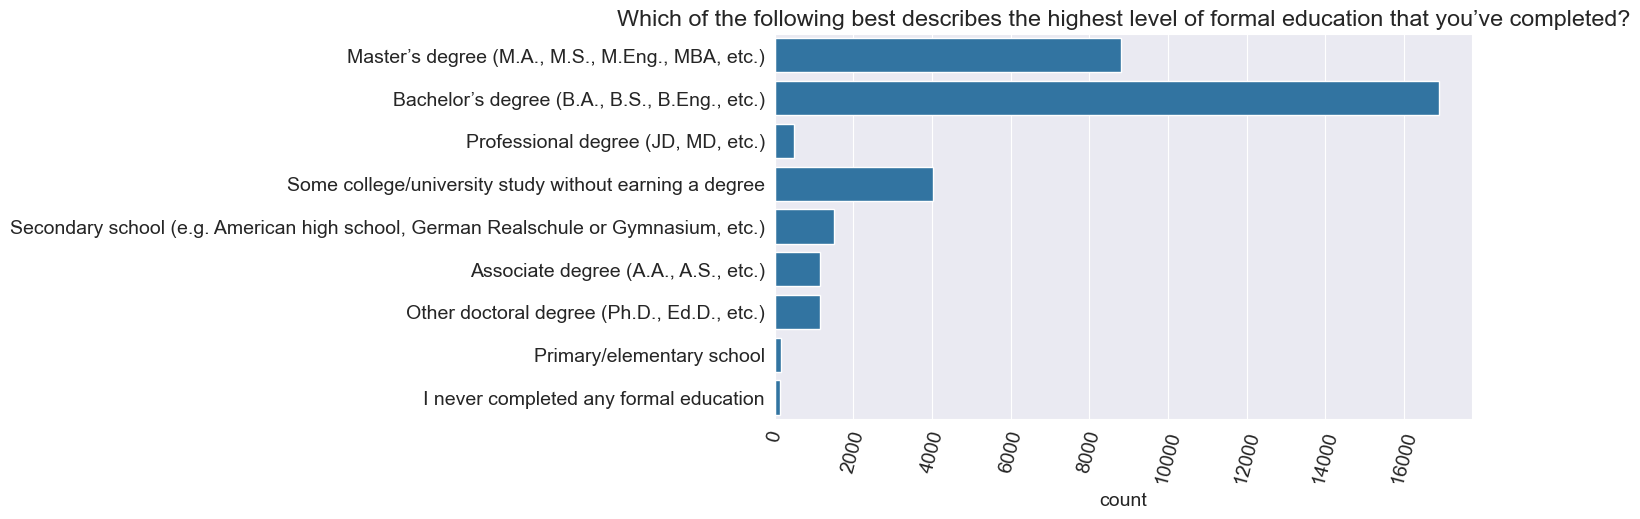

In [115]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema_raw_df.EdLevel)
plt.ylabel(None);

## For Primary Field of Study

In [131]:
schema_raw_df.UndergradMajor

'What was your primary field of study?'

In [134]:
undergraduate_percentages = survey_df.UndergradMajor.value_counts(normalize=True)*100
undergraduate_percentages

UndergradMajor
Computer science, computer engineering, or software engineering                   62.393638
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.186547
Information systems, information technology, or system administration              7.930320
A natural science (such as biology, chemistry, physics, etc.)                      4.604103
Mathematics or statistics                                                          3.716080
Web development or web design                                                      2.880658
A business discipline (such as accounting, finance, marketing, etc.)               2.611467
A humanities discipline (such as literature, history, philosophy, etc.)            2.175191
A social science (such as anthropology, psychology, political science, etc.)       1.853399
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.513042
I never declared a major                                         

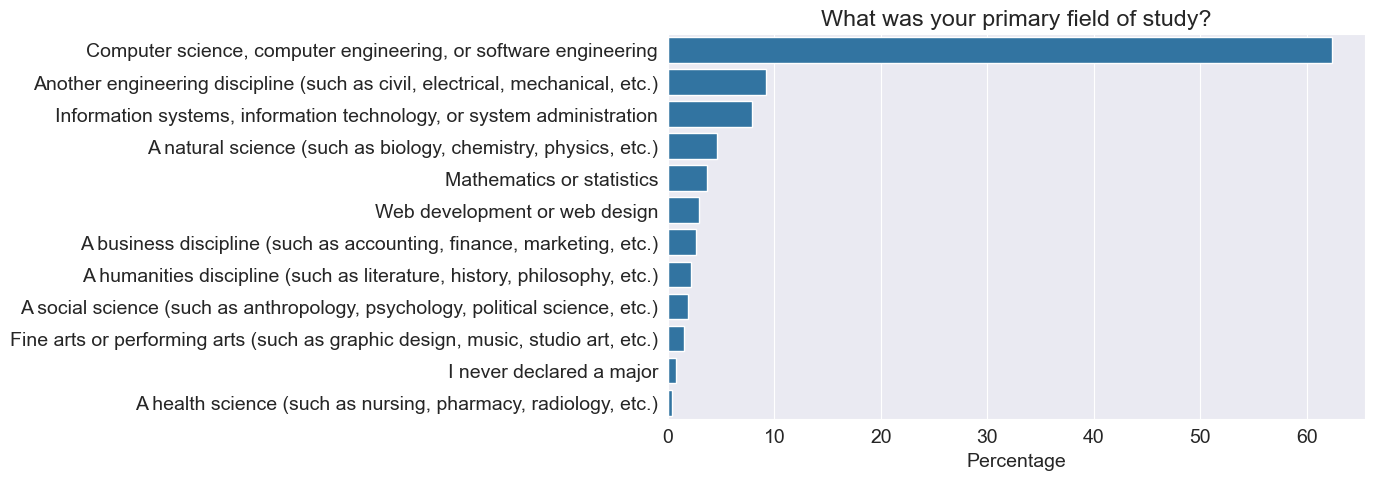

In [136]:
sns.barplot(x=undergraduate_percentages,y=undergraduate_percentages.index)
plt.title(schema_raw_df.UndergradMajor)
plt.ylabel(None)
plt.xlabel("Percentage");

## Analyzing The Employment Data

In [137]:
schema_raw_df.Employment

'Which of the following best describes your current employment status?'

In [140]:
survey_df.Employment.value_counts()

Employment
Employed full-time                                      30393
Independent contractor, freelancer, or self-employed     3327
Employed part-time                                       1104
Name: count, dtype: int64

In [141]:
percentage_of_employment_status = survey_df.Employment.value_counts(normalize=True)*100
percentage_of_employment_status

Employment
Employed full-time                                      87.276017
Independent contractor, freelancer, or self-employed     9.553756
Employed part-time                                       3.170227
Name: proportion, dtype: float64

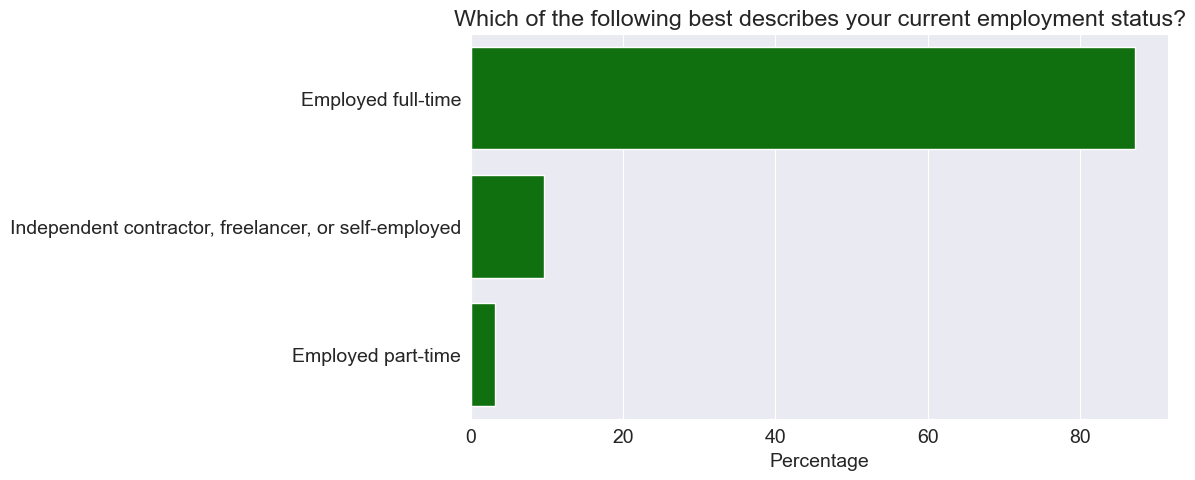

In [144]:
sns.barplot(x=percentage_of_employment_status,y=percentage_of_employment_status.index,color='g')
plt.title(schema_raw_df.Employment)
plt.ylabel(None)
plt.xlabel("Percentage");

## Analyzing Developer Types

In [145]:
schema_raw_df.DevType

'Which of the following describe you? Please select all that apply.'

In [149]:
survey_df.DevType.value_counts()



DevType
Developer, full-stack                                                                                                                                                        3106
Developer, back-end                                                                                                                                                          2154
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                               1680
Developer, back-end;Developer, full-stack                                                                                                                                    1125
Developer, front-end                                                                                                                                                          912
                                                                                                      

In [13]:
## spliting multicolumns

def split_multicolumns(col_series):
    result_df = col_series.to_frame()
    options = []

    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False

            result_df.at[idx, option] = True
    return result_df[options]


In [160]:
dev_type_df = split_multicolumns(survey_df.DevType)
dev_type_df

,"Developer, back-end","Developer, desktop or enterprise applications","Developer, game or graphics","Developer, full-stack",Database administrator,"Developer, mobile","Developer, embedded applications or devices","Developer, front-end",Designer,"Developer, QA or test",...,Data scientist or machine learning specialist,Engineering manager,Product manager,"Engineer, data",Scientist,Academic researcher,Senior executive/VP,System administrator,"Engineer, site reliability",Marketing or sales professional
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,True,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62212,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63083,False,True,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
63402,True,True,False,True,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
63517,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [167]:
dev_type_totall = dev_type_df.sum().sort_values(ascending=False)
dev_type_totall

Developer, full-stack                            19712
Developer, back-end                              19657
Developer, front-end                             12888
Developer, desktop or enterprise applications     8479
Developer, mobile                                 6477
DevOps specialist                                 4593
Database administrator                            4044
System administrator                              3679
Designer                                          3316
Developer, embedded applications or devices       3258
Developer, QA or test                             2839
Data scientist or machine learning specialist     2624
Data or business analyst                          2605
Engineer, data                                    2544
Academic researcher                               2176
Educator                                          1937
Engineering manager                               1869
Developer, game or graphics                       1808
Product ma

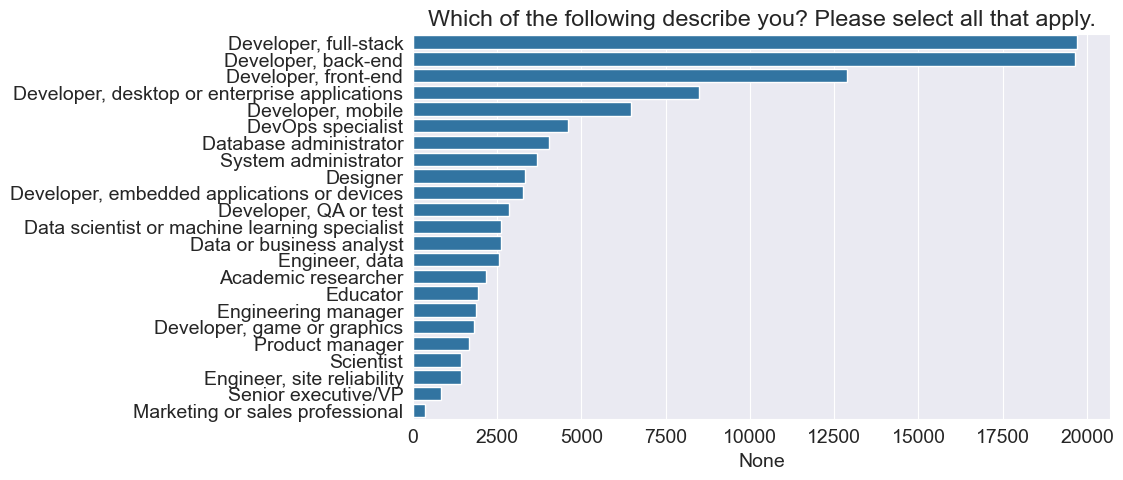

In [170]:
sns.barplot(x= dev_type_totall, y= dev_type_totall.index)
plt.title(schema_raw_df.DevType)
plt.ylabel(None);


## Asking And Answering Questions

# Q: Which were the most popular programming language in 2020

In [171]:
survey_df.LanguageWorkedWith

3                                                      NaN
7                                               Python;SQL
8                                  HTML/CSS;JavaScript;PHP
9                      HTML/CSS;Java;JavaScript;Python;SQL
10                                     C#;JavaScript;Swift
                               ...                        
62212                           C#;HTML/CSS;JavaScript;SQL
63083          HTML/CSS;Java;JavaScript;PHP;SQL;TypeScript
63402    Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
63517    Assembly;C;C++;HTML/CSS;Java;JavaScript;PHP;Py...
63955                          HTML/CSS;JavaScript;PHP;SQL
Name: LanguageWorkedWith, Length: 35049, dtype: object

In [172]:
schema_raw_df.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [26]:
languages_worked_df = split_multicolumns(survey_df.LanguageWorkedWith)
languages_worked_df

,Python,SQL,HTML/CSS,JavaScript,PHP,Java,C#,Swift,C,TypeScript,...,C++,Go,Haskell,Ruby,Rust,Scala,Dart,Assembly,Objective-C,Julia
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,True,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62212,False,True,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63083,False,True,True,True,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
63402,True,True,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
63517,True,True,True,True,True,True,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False


In [174]:
language_worked_percentage = languages_worked_df.mean().sort_values(ascending=False)*100
language_worked_percentage

JavaScript               69.611116
HTML/CSS                 62.001769
SQL                      57.028731
Python                   40.962652
Java                     36.842706
Bash/Shell/PowerShell    36.263517
C#                       32.574396
TypeScript               29.093555
PHP                      24.751063
C++                      18.830780
C                        16.297184
Go                        9.438215
Kotlin                    7.997375
Ruby                      7.743445
Swift                     5.894605
VBA                       5.883192
R                         5.238381
Rust                      4.701989
Objective-C               4.262604
Assembly                  4.125653
Scala                     3.954464
Dart                      3.418072
Perl                      3.198379
Haskell                   1.580644
Julia                     0.690462
dtype: float64

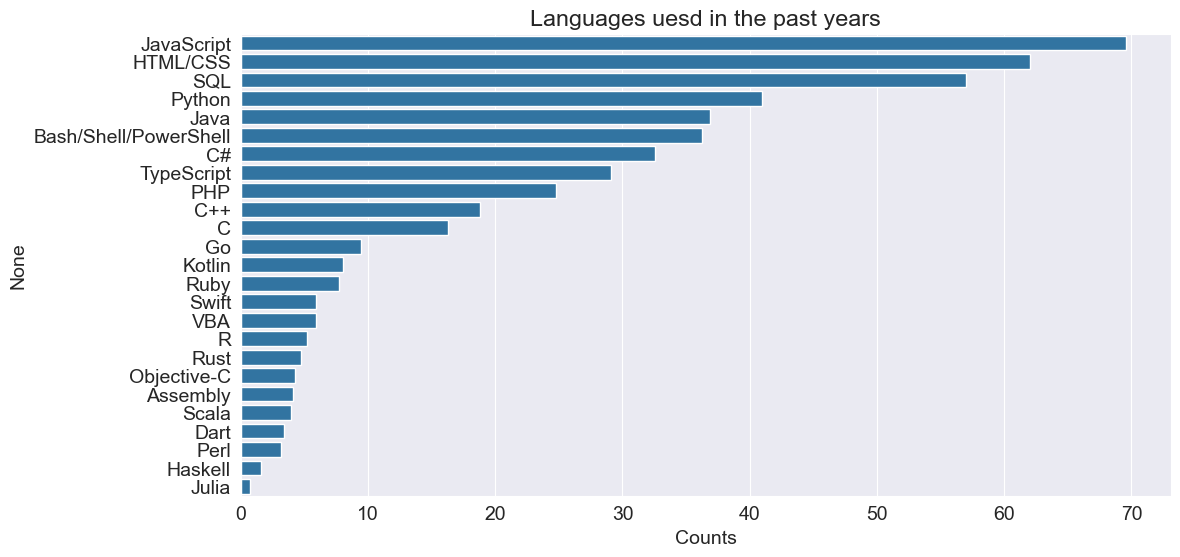

In [179]:
plt.figure(figsize=(12,6))
sns.barplot(x=language_worked_percentage, y= language_worked_percentage.index)
plt.title("Languages uesd in the past years")
plt.xlabel("Counts");


# Q: What Language are the most people interested to learn over the next year? mean 2021

In [20]:
survey_df.LanguageDesireNextYear

3                                                      NaN
7                                               JavaScript
8                                              Python;Rust
9                    HTML/CSS;Java;JavaScript;Python;R;SQL
10                          Go;JavaScript;Swift;TypeScript
                               ...                        
62212    Assembly;Bash/Shell/PowerShell;C#;Go;HTML/CSS;...
63083                   HTML/CSS;JavaScript;SQL;TypeScript
63402    Bash/Shell/PowerShell;Go;JavaScript;Python;Typ...
63517                                      Go;Python;R;SQL
63955                                           TypeScript
Name: LanguageDesireNextYear, Length: 35049, dtype: object

In [21]:
schema_raw_df.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [22]:
des_language_worked_df = split_multicolumns(survey_df.LanguageDesireNextYear)
des_language_worked_df

,JavaScript,Python,Rust,HTML/CSS,Java,R,SQL,Go,Swift,TypeScript,...,Bash/Shell/PowerShell,Julia,Kotlin,Dart,PHP,Scala,C,Assembly,Objective-C,VBA
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,True,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62212,True,True,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,True,False,False
63083,True,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
63402,True,True,False,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
63517,False,True,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
des_language_worked_percentage = des_language_worked_df.mean().sort_values(ascending=False)*100
des_language_worked_percentage

JavaScript               46.406460
Python                   44.329367
HTML/CSS                 36.936860
SQL                      36.337699
TypeScript               33.607236
C#                       24.756769
Go                       23.604097
Bash/Shell/PowerShell    22.123313
Java                     20.736683
Rust                     19.615396
Kotlin                   16.539702
C++                      13.794973
PHP                      10.662216
Swift                     9.261320
C                         8.425347
Dart                      7.703501
Ruby                      6.804759
R                         6.439556
Scala                     6.339696
Haskell                   4.864618
Assembly                  2.858855
Julia                     2.473680
Objective-C               2.148421
Perl                      1.572085
VBA                       1.346686
dtype: float64

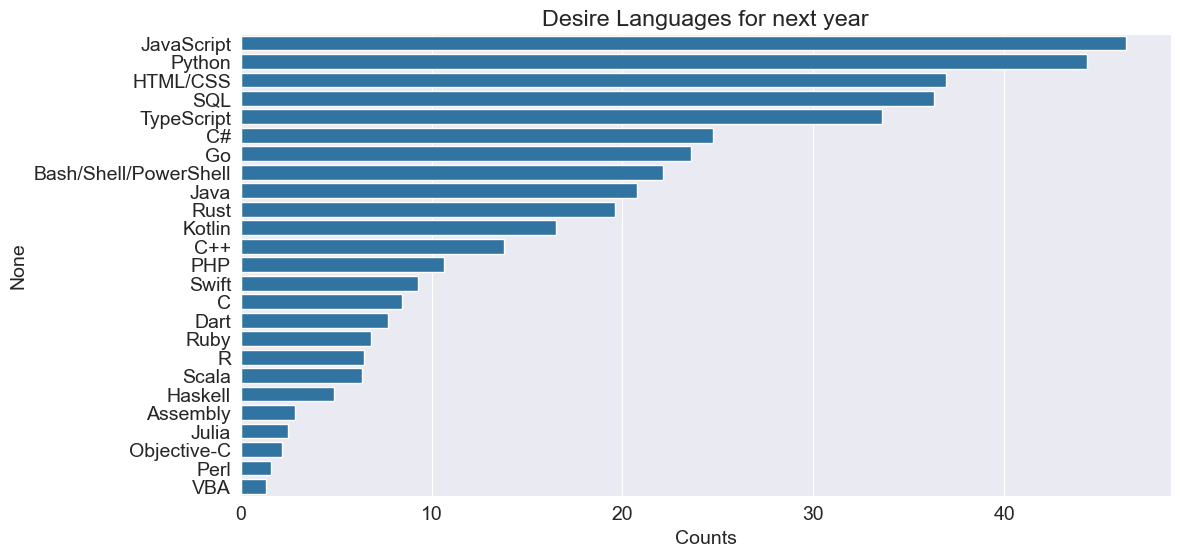

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=des_language_worked_percentage, y= des_language_worked_percentage.index)
plt.title("Desire Languages for next year")
plt.xlabel("Counts");


# Q: Which of the most loved Language i.e a high percentage of people who have used the language want to continue learning and using it over next years

In [27]:
language_loved_df = languages_worked_df & des_language_worked_df
language_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,True,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62212,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
63083,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
63402,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
63517,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [28]:
language_loved_percentage = (language_loved_df.sum()*100 / languages_worked_df.sum().sort_values(ascending=False))
language_loved_percentage

Assembly                 28.838174
Bash/Shell/PowerShell    55.310779
C                        35.696779
C#                       64.202505
C++                      45.772727
Dart                     64.524207
Go                       64.993954
HTML/CSS                 56.803645
Haskell                  55.054152
Java                     45.597460
JavaScript               60.537749
Julia                    63.223140
Kotlin                   66.072066
Objective-C              21.753681
PHP                      38.155620
Perl                     27.207850
Python                   69.046458
R                        46.514161
Ruby                     44.030951
Rust                     87.742718
SQL                      59.655793
Scala                    55.339105
Swift                    61.810261
TypeScript               69.991174
VBA                      17.604268
dtype: float64

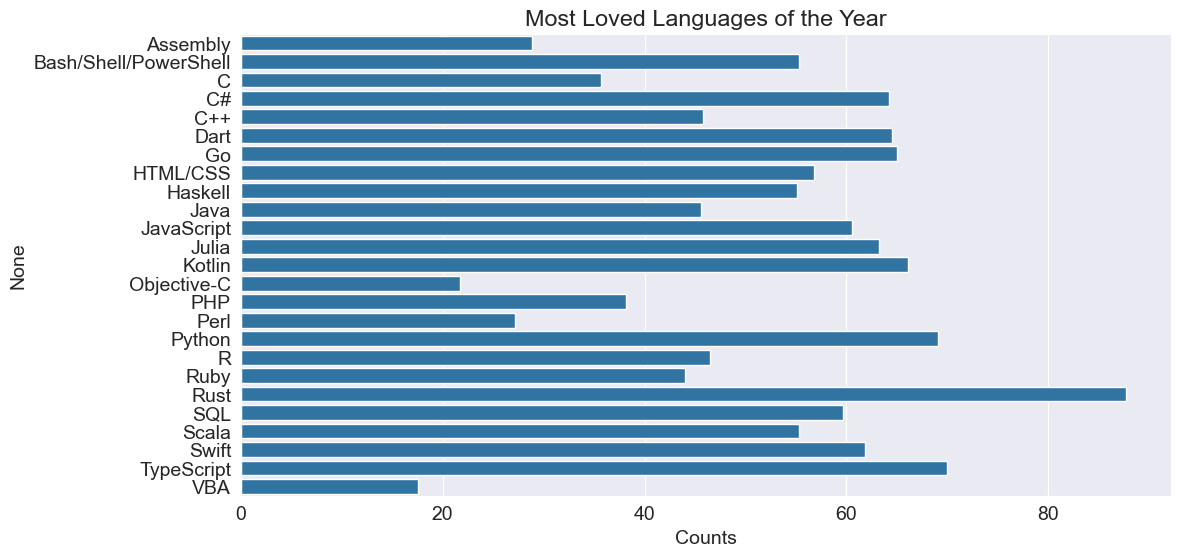

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x=language_loved_percentage, y= language_loved_percentage.index)
plt.title("Most Loved Languages of the Year")
plt.xlabel("Counts");


# Q: In which Countries do developers work the highest number of hours per week? Consider those countries with more than 250 responses only

In [ ]:
survey_df.WorkWeekHrs

In [31]:
countries_df = survey_df.groupby("Country")[["WorkWeekHrs","Age"]].mean().sort_values("WorkWeekHrs",ascending=False)
countries_df

,WorkWeekHrs,Age
Country,,
Guyana,60.000000,26.500000
Haiti,60.000000,27.000000
Iraq,53.125000,26.875000
Kuwait,52.166667,30.166667
Tajikistan,50.000000,26.000000
...,...,...
San Marino,23.000000,40.500000
Botswana,21.400000,29.200000
Brunei Darussalam,19.500000,25.000000


In [36]:

high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)
high_response_countries_df
 

,WorkWeekHrs,Age
Country,,
Israel,43.747340,34.289894
Iran,43.668498,28.230769
United States,41.746969,34.638582
Turkey,41.410526,30.600000
South Africa,41.070707,33.016835
India,40.502655,27.217348
Belgium,40.366782,32.321799
Canada,40.069899,33.272196
Pakistan,39.931090,26.615385


# Q: How important is it to start young to build career in programming?

In [14]:
schema_raw_df.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

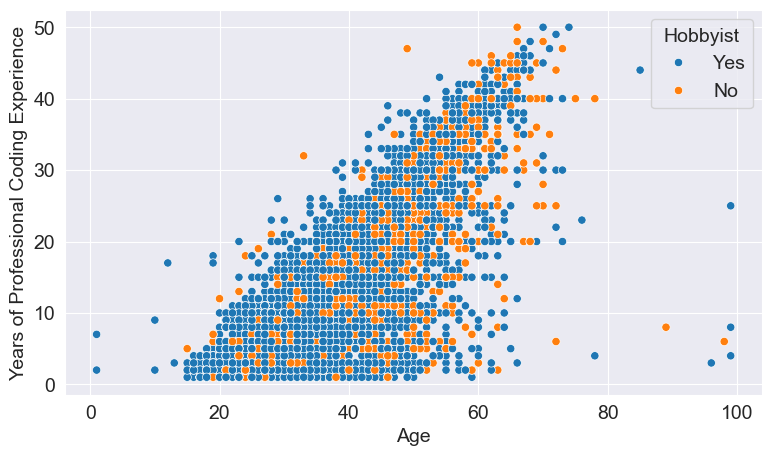

In [16]:
sns.scatterplot(x='Age',y='YearsCodePro',hue="Hobbyist", data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of Professional Coding Experience");

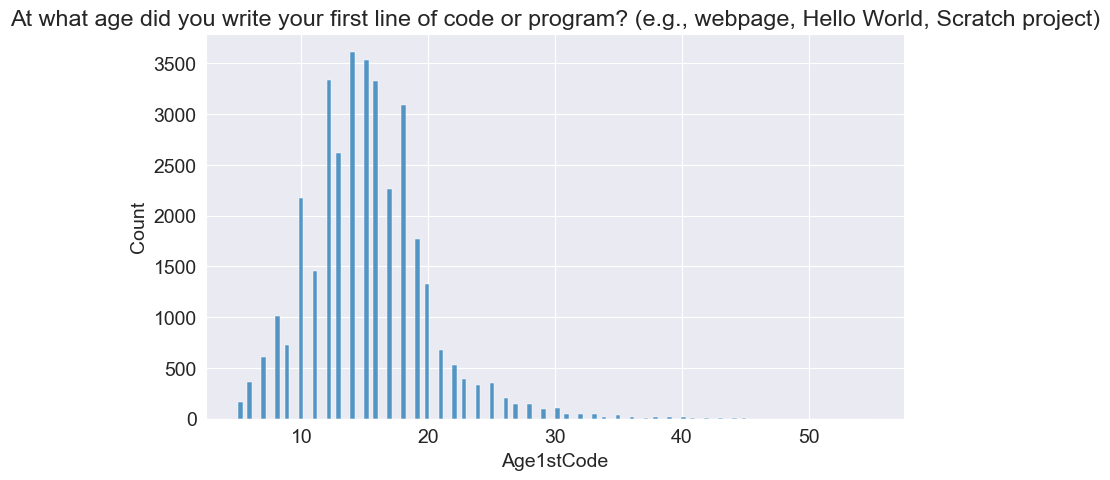

In [24]:
# First Time Coding

plt.title(schema_raw_df.Age1stCode)
sns.histplot(x=survey_df.Age1stCode);
